In [1]:
import os
os.system('pip install matplotlib')

0

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 10)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['font.size'] = 14

In [4]:
import warnings
warnings.simplefilter("ignore")

from tqdm.notebook import trange

import numpy as np
import pandas as pd

from btb.tuning.hyperparams import IntHyperParam, FloatHyperParam
from btb.tuning.tunable import Tunable
from btb.tuning.tuners import UniformTuner
from btb.tuning.tuners.gaussian_process import GPTuner

In [5]:
def rosenbrock(x, y, a=1, b=100):
    """Bigger is better; global optimum at x=a, y=a**2"""
    return -1 * ((a - x)**2 + b * (y - x**2)**2)

In [6]:
hyperparams = {
    'x': FloatHyperParam(-5, 10),
    'y': FloatHyperParam(-5, 10)
}
tunable = Tunable(hyperparams)

In [7]:
tuner = GPTuner(tunable, scale=10)
best_score = -np.inf

scores = list()
best_scores = list()

for _ in trange(300):
    proposal = tuner.propose()
    score = rosenbrock(**proposal)
    tuner.record(proposal, score)

    if score > best_score:
        best_score = score
        
    scores.append(score)
    best_scores.append(best_score)

sdf = pd.DataFrame({
    'score': -np.log(-np.array(scores) + 1),
    'best_score': -np.log(-np.array(best_scores) + 1),
})

print("Best Score: ", best_score)


Best Score:  -0.0009685227211595579


In [8]:
sdf = pd.DataFrame({
    'score': -np.log(-np.array(scores) + 1),
    'best_score': -np.log(-np.array(best_scores) + 1),
})

In [9]:
sdf.mean()

score        -1.06210
best_score   -0.46129
dtype: float64

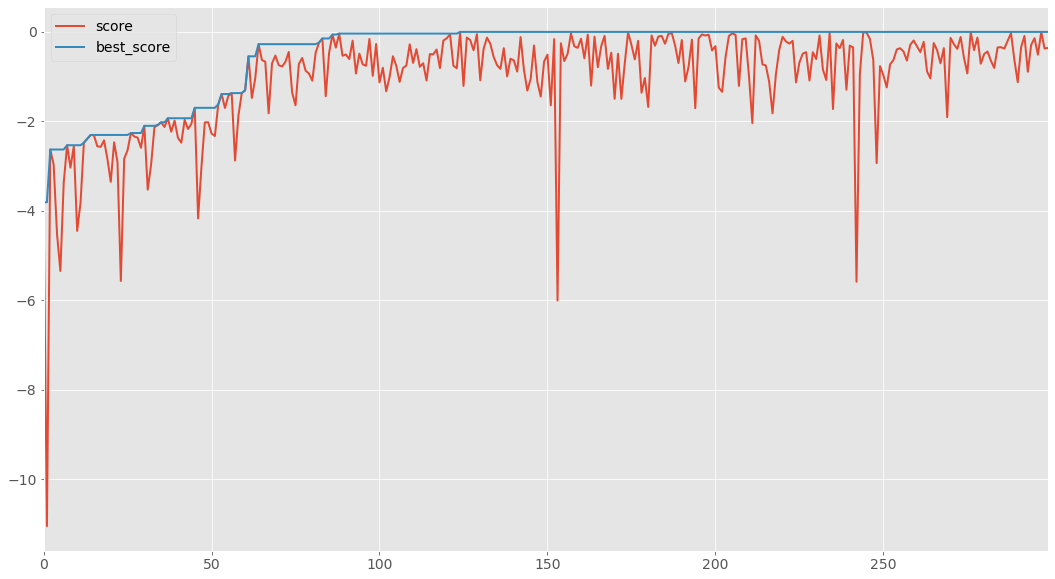

In [10]:
sdf.plot()